# Todo

1. Weekly, monthly, quarterly data
2. find stats and the same procedure to get optimal timeframe

In [1]:
import pandas_datareader as pdf
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
URL='https://www1.nseindia.com/content/indices/ind_nifty50list.csv'
df=pd.read_csv(URL, index_col='Company Name')
df

Industry  \
Company Name                                                                   
Adani Enterprises Ltd.                                       Metals & Mining   
Adani Ports and Special Economic Zone Ltd.                          Services   
Apollo Hospitals Enterprise Ltd.                                  Healthcare   
Asian Paints Ltd.                                          Consumer Durables   
Axis Bank Ltd.                                            Financial Services   
Bajaj Auto Ltd.                               Automobile and Auto Components   
Bajaj Finance Ltd.                                        Financial Services   
Bajaj Finserv Ltd.                                        Financial Services   
Bharat Petroleum Corporation Ltd.                 Oil Gas & Consumable Fuels   
Bharti Airtel Ltd.                                         Telecommunication   
Britannia Industries Ltd.                         Fast Moving Consumer Goods   
Cipla Ltd.                                                        Healthcare   
Coal India Ltd.                                   Oil Gas & Consumable Fuels   
Divi's Laboratories Ltd.                                          Healthcare   
Dr. Reddy's Laboratories Ltd.                                     Healthcare   
Eicher Motors Ltd.                            Automobile and Auto Components   
Grasim Industries Ltd.                                Construction Materials   
HCL Technologies Ltd.                                 Information Technology   
HDFC Bank Ltd.                                            Financial Services   
HDFC Life Insurance Company Ltd.                          Financial Services   
Hero MotoCorp Ltd.                            Automobile and Auto Components   
Hindalco Industries Ltd.                                     Metals & Mining   
Hindustan Unilever Ltd.                           Fast Moving Consumer Goods   
Housing Development Finance Corporation Ltd.              Financial Services   
ICICI Bank Ltd.                                           Financial Services   
ITC Ltd.                                          Fast Moving Consumer Goods   
IndusInd Bank Ltd.                                        Financial Services   
Infosys Ltd.                                          Information Technology   
JSW Steel Ltd.                                               Metals & Mining   
Kotak Mahindra Bank Ltd.                                  Financial Services   
Larsen & Toubro Ltd.                                            Construction   
Mahindra & Mahindra Ltd.                      Automobile and Auto Components   
Maruti Suzuki India Ltd.                      Automobile and Auto Components   
NTPC Ltd.                                                              Power   
Nestle India Ltd.                                 Fast Moving Consumer Goods   
Oil & Natural Gas Corporation Ltd.                Oil Gas & Consumable Fuels   
Power Grid Corporation of India Ltd.                                   Power   
Reliance Industries Ltd.                          Oil Gas & Consumable Fuels   
SBI Life Insurance Company Ltd.                           Financial Services   
State Bank of India                                       Financial Services   
Sun Pharmaceutical Industries Ltd.                                Healthcare   
Tata Consultancy Services Ltd.                        Information Technology   
Tata Consumer Products Ltd.                       Fast Moving Consumer Goods   
Tata Motors Ltd.                              Automobile and Auto Components   
Tata Steel Ltd.                                              Metals & Mining   
Tech Mahindra Ltd.                                    Information Technology   
Titan Company Ltd.                                         Consumer Durables   
UPL Ltd.                                                           Chemicals   
UltraTech Cement Ltd.                                 Construction M

In [3]:
yf.pdr_override()

In [4]:
# end=datetime.date.today()
# start=datetime.date(2017, datetime.date.today().month, datetime.date.today().day)
start=datetime.datetime(2017, 11, 6)
end=datetime.datetime(2022, 11, 6)

start2=end
end2=datetime.datetime(2023, 2, 15)

start, end

(datetime.datetime(2017, 11, 6, 0, 0), datetime.datetime(2022, 11, 6, 0, 0))

In [5]:
ticks=df['Symbol'].to_list()
ticks=[x+'.NS' for x in ticks]
ticks

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [6]:
def get_data(ticks, start, end):
    data_dict={'1d':pd.DataFrame(), '1mo': pd.DataFrame()}
    # d=pd.DataFrame()
    # for i in ticks:
    #     stock=yf.Ticker(i).history(start=start, end=end, period='1mo')['Close']
    #     stock=stock.rename(i)
    #     d=pd.concat([d, stock], axis=1)
    for key in data_dict.keys():
        data_dict[key]=yf.download(' '.join(ticks), start=start, end=end, interval=key)

    
    return data_dict

d=get_data(ticks, start, end)

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed


In [8]:
d2=get_data(ticks, start2, end2)

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed


In [19]:
df=pd.concat([d['1d'], d2['1d']])

In [6]:
d['1mo'].head()


ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2017-12-01    89.332932     393.491821    1184.884399    1119.697632   
2018-01-01   114.492226     415.996552    1143.578735    1090.509399   
2018-02-01   109.309998     396.110992    1183.163208    1080.312500   
2018-03-01    83.989601     343.486938    1047.051147    1082.873901   
2018-04-01    88.590630     395.092407    1072.965454    1161.450806   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
Date                                                                   
2017-12-01   562.394409    2848.443359     522.109619    1737.458862   
2018-01-01   591.962646    2851.476562     480.379028    1659.472656   
2018-02-01   527.291565    2580.996094     504.271515    1622.284546   
2018-03-01   509.091858    2345.249023     516.235168    1748.190308   
2018-04-01   515.873108    2522.892578     547.284851    1886.805054   

            BHARTIARTL.NS     BPCL.NS  ...  SUNPHARMA.NS  TATACONSUM.NS  \
Date                                   ...                                
2017-12-01     472.478577  363.712555  ...    544.090271     303.552124   
2018-01-01     392.371796  345.867615  ...    552.425842     278.847717   
2018-02-01     384.725677  301.782318  ...    509.986359     264.312927   
2018-03-01     357.928192  310.004364  ...    471.643402     248.243073   
2018-04-01     367.668610  280.922180  ...    503.365692     285.467499   

            TATAMOTORS.NS  TATASTEEL.NS       TCS.NS    TECHM.NS    TITAN.NS  \
Date                                                                           
2017-12-01     431.850006     28.314140  1209.131592  432.795807  835.263855   
2018-01-01     399.500000     28.608959  1393.173706  526.043762  846.359741   
2018-02-01     369.899994     27.251654  1361.793579  526.043762  794.383972   
2018-03-01     326.850006     23.171612  1278.382080  548.411316  917.169617   
2018-04-01     340.399994     24.141411  1584.814331  575.801758  955.616150   

            ULTRACEMCO.NS      UPL.NS    WIPRO.NS  
Date                                               
2017-12-01    4239.301270  479.675476  229.930206  
2018-01-01    4299.545898  472.977509  222.942642  
2018-02-01    4077.405518  458.323700  214.935089  
2018-03-01    3875.674072  459.267090  206.383209  
2018-04-01    4031.535400  459.015533  204.621445  

[5 rows x 50 columns]

In [8]:
#Computing the pairwise correlation of Companies 
corr_matrix = d.corr()
corr_matrix

AttributeError: 'dict' object has no attribute 'corr'

<AxesSubplot:>

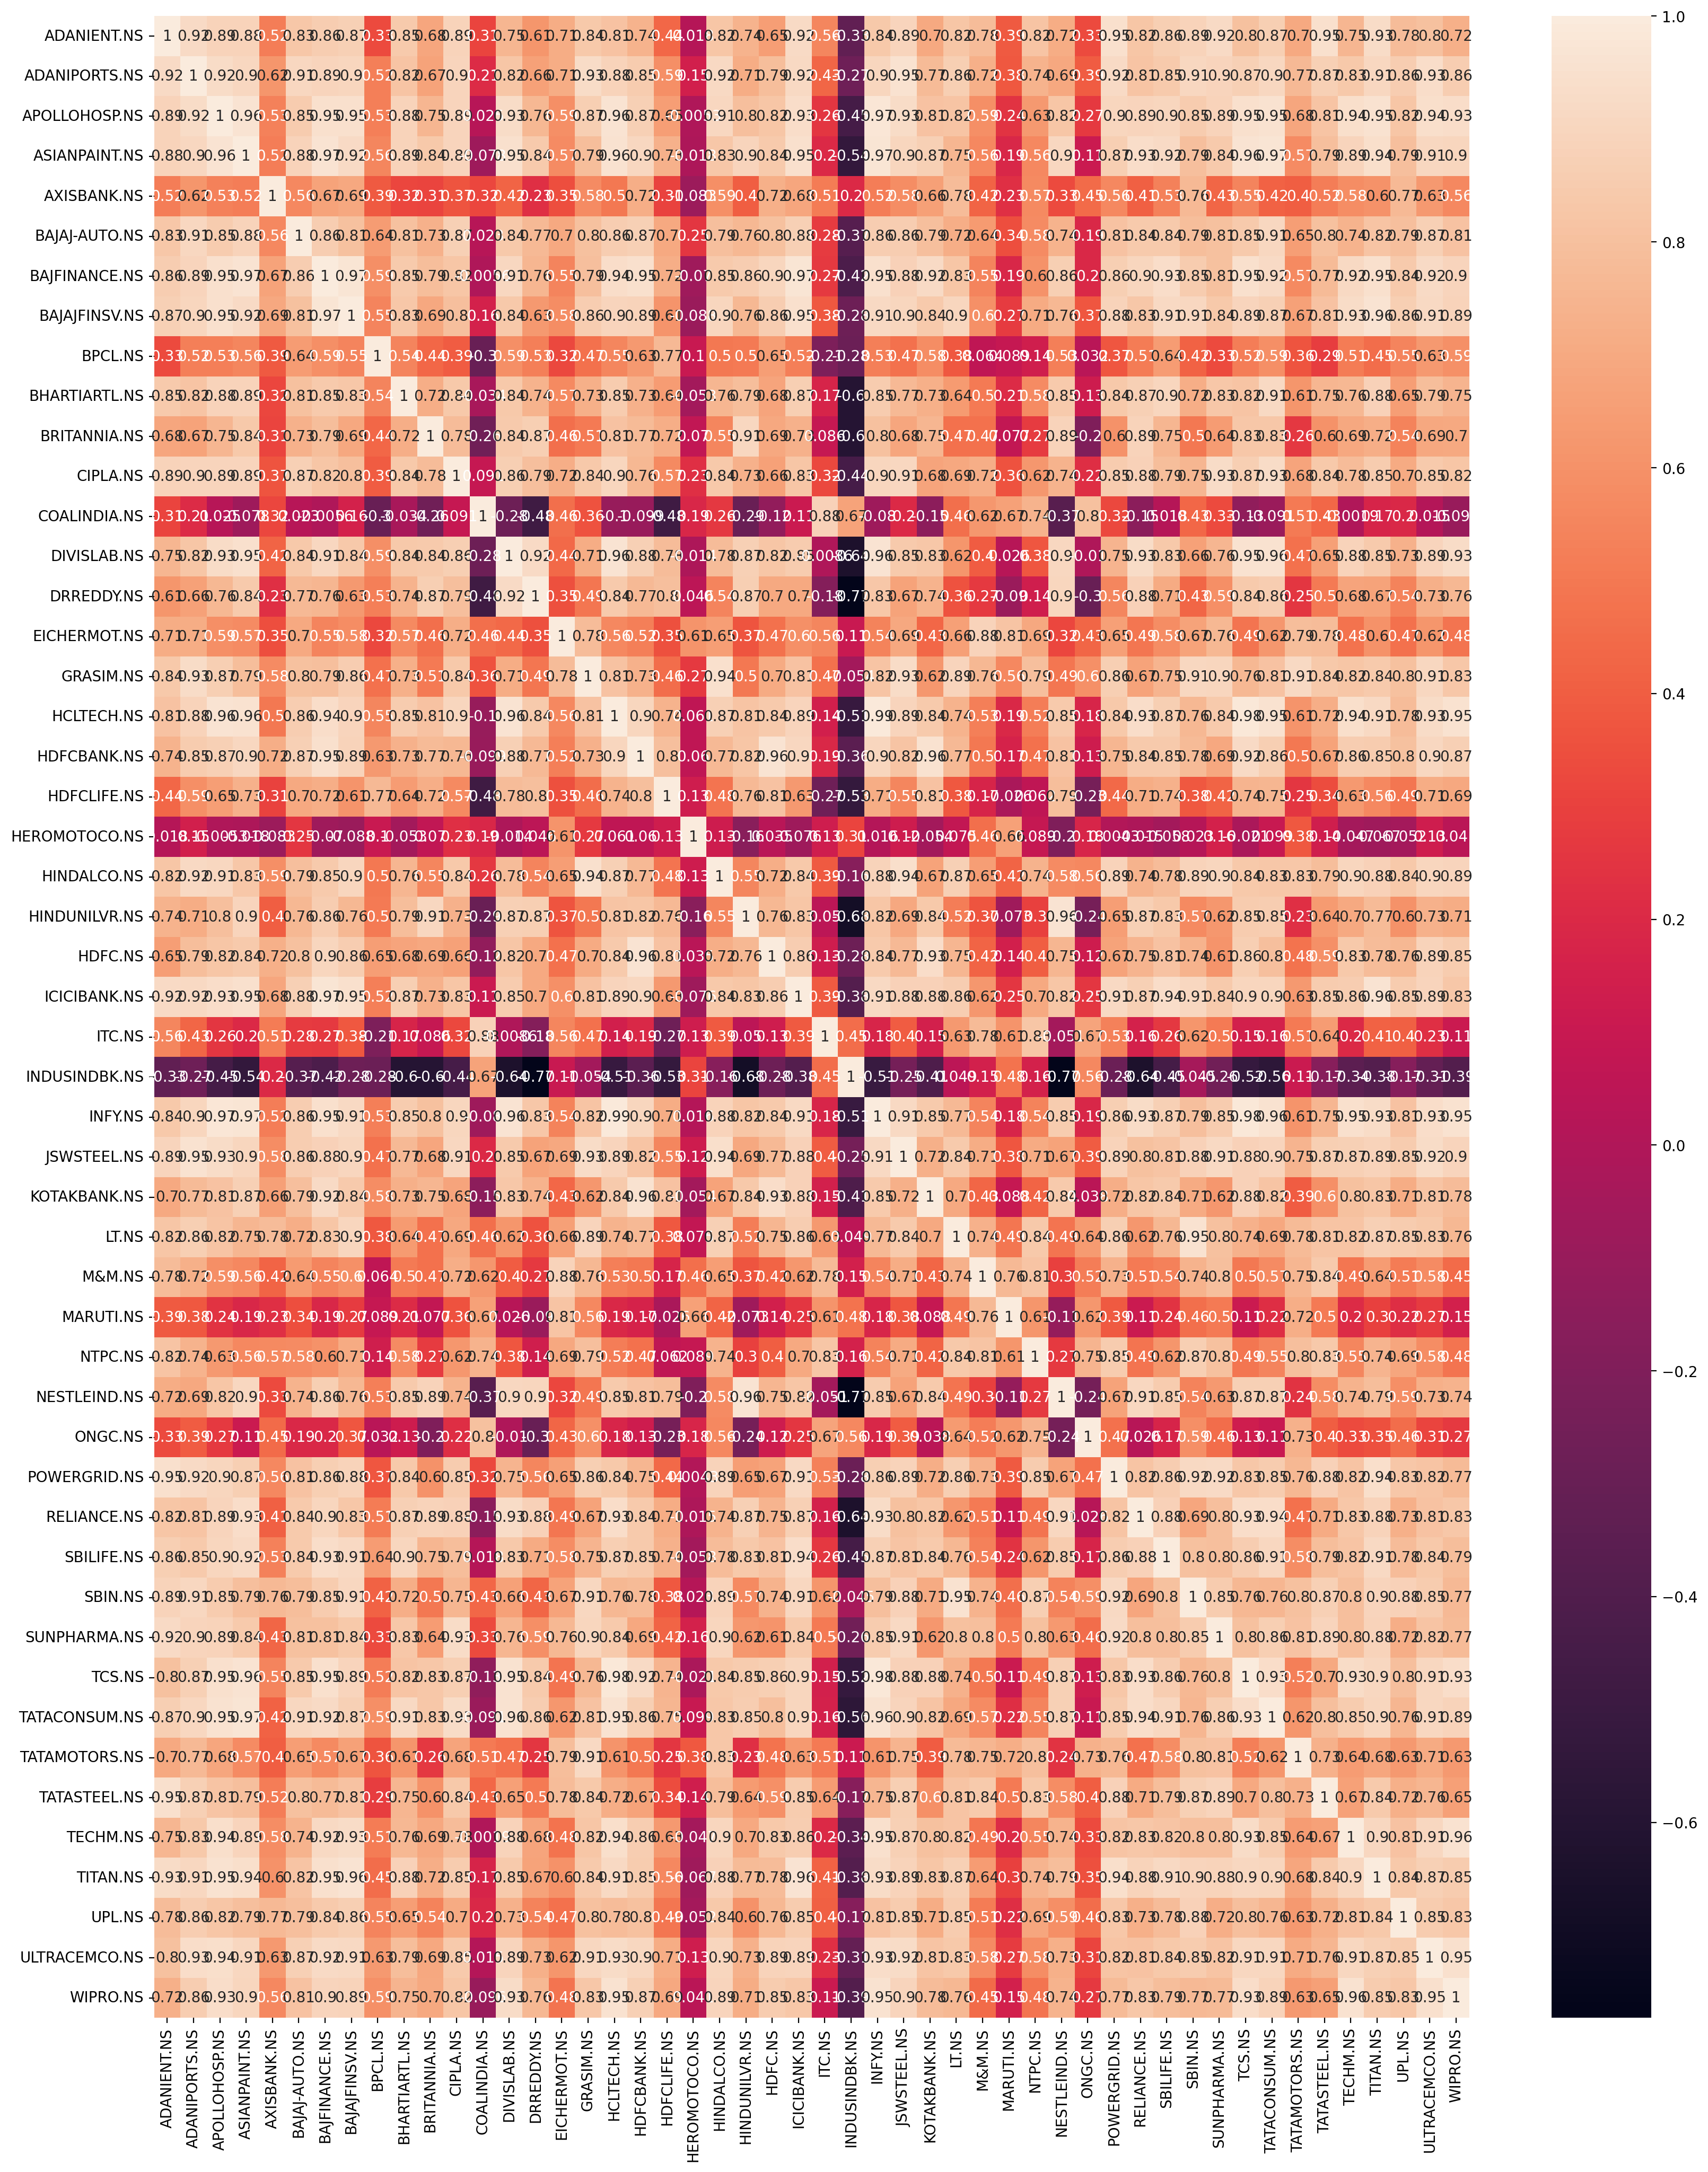

In [8]:
# heatmap matrix of corelation
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [25]:
neg_corr=[]
stocks=set()
for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if corr_matrix[i][j]<0:
            stocks.add(i)
            stocks.add(j)
            neg_corr.append((i,j,corr_matrix[i][j]))
neg_corr

[('ADANIENT.NS', 'INDUSINDBK.NS', -0.3289844440668468),
 ('ADANIPORTS.NS', 'INDUSINDBK.NS', -0.27027348987209665),
 ('APOLLOHOSP.NS', 'HEROMOTOCO.NS', -0.0053202814896266435),
 ('APOLLOHOSP.NS', 'INDUSINDBK.NS', -0.4506241086667635),
 ('ASIANPAINT.NS', 'COALINDIA.NS', -0.07817605765176534),
 ('ASIANPAINT.NS', 'HEROMOTOCO.NS', -0.017674198215211386),
 ('ASIANPAINT.NS', 'INDUSINDBK.NS', -0.5364524101404908),
 ('AXISBANK.NS', 'HEROMOTOCO.NS', -0.08306382872317915),
 ('BAJAJ-AUTO.NS', 'INDUSINDBK.NS', -0.3716186985267426),
 ('BAJAJFINSV.NS', 'HEROMOTOCO.NS', -0.08762602765114018),
 ('BAJAJFINSV.NS', 'INDUSINDBK.NS', -0.27715286038251263),
 ('BAJFINANCE.NS', 'COALINDIA.NS', -0.0055645138951288175),
 ('BAJFINANCE.NS', 'HEROMOTOCO.NS', -0.07020663723768056),
 ('BAJFINANCE.NS', 'INDUSINDBK.NS', -0.4183693490928722),
 ('BHARTIARTL.NS', 'COALINDIA.NS', -0.03350926652252864),
 ('BHARTIARTL.NS', 'HEROMOTOCO.NS', -0.05310320835232665),
 ('BHARTIARTL.NS', 'INDUSINDBK.NS', -0.5962110373048987),
 ('BP

In [26]:
pd.DataFrame(neg_corr, columns=['A', 'B', 'Corr']).sort_values(by='Corr')

A              B      Corr
50      DRREDDY.NS  INDUSINDBK.NS -0.773245
103  INDUSINDBK.NS     DRREDDY.NS -0.773245
146   NESTLEIND.NS  INDUSINDBK.NS -0.766605
115  INDUSINDBK.NS   NESTLEIND.NS -0.766605
86   HINDUNILVR.NS  INDUSINDBK.NS -0.680041
..             ...            ...       ...
25    COALINDIA.NS  BAJFINANCE.NS -0.005565
2    APOLLOHOSP.NS  HEROMOTOCO.NS -0.005320
66   HEROMOTOCO.NS  APOLLOHOSP.NS -0.005320
170       TECHM.NS   COALINDIA.NS -0.001853
42    COALINDIA.NS       TECHM.NS -0.001853

[180 rows x 3 columns]

In [14]:
pairings=[['DRREDDY.NS', 'INDUSINDBK.NS'], ['POWERGRID.NS','INDUSINDBK.NS'], ['DRREDDY.NS', 'HEROMOTOCO.NS'], ['SUNPHARMA.NS','INDUSINDBK.NS'], ['BRITANNIA.NS', 'INDUSINDBK.NS']]

In [16]:
def port_mean(weight, means):
    return np.dot(weight, means)

def port_vari(weight, var_stock1, var_stock2, covar):
    return var_stock1*(weight[0]**2) + var_stock2*(weight[1]**2) + 2*weight[0]*weight[1]*covar

In [9]:
reg_dict={'1d': np.sqrt(252), '1mo': np.sqrt(12)}

In [21]:
def get_lstm(pairings, lags=3):
    ret1, ret2=df[pairings[0]].pct_change()*100, df[pairings[1]].pct_change()*100
    weights=[0.5, 0.5]
    lstm_dataset=pd.DataFrame(index=df.index)
    lstm_dataset['ret_x']=port_mean(weights, [ret1, ret2])
    for i in range(1, lags+1):
        lstm_dataset[f'ret_x-{i}']=lstm_dataset['ret_x'].shift(i)
        
    return lstm_dataset

for i in range(len(pairings)):
    get_lstm(pairings[i], lags=10).to_csv(f'lstm_dsets/lstm_dataset_{i}.csv')

In [27]:
def get_sharpe(stock1, stock2, d):
    ret1, ret2=d[stock1].pct_change().dropna()*100, d[stock2].pct_change().dropna()*100
    # print(ret1, ret2)
    mean_stock1, mean_stock2=ret1.mean(), ret2.mean()
    var_stock1, var_stock2=ret1.var(), ret2.var()
    covar=np.cov(ret1, ret2)[0][1]
    # print(mean_stock1, mean_stock2, var_stock1, var_stock2, covar) 
    # corr=ret1.corr(ret2)
    a={
        'w1':[],
        'w2':[],
        'mean':[],
        'std dev':[],
        'var':[],
        'sharpe':[],
    }
    
    weights=np.vstack((np.arange(0,1.1,0.1), 1-np.arange(0,1.1,0.1))).T
    
    
    for weight in weights:
        a['w1'].append(weight[0])
        a['w2'].append(weight[1])
        a['mean'].append(port_mean(weight, [mean_stock1, mean_stock2]))
        port_var=port_vari(weight, var_stock1, var_stock2, covar)
        a['var'].append(port_var)
        a['std dev'].append(np.sqrt(port_var))

        a['sharpe'].append((a['mean'][-1]-0.06/a['std dev'][-1]))
        
    portf_ret=np.dot([0.5, 0.5], [ret1, ret2])
    print(portf_ret.var())
    
    sns.scatterplot(x=a['std dev'], y=a['mean'])
    # plt.legend()
    
    # for i in range(len(weights)):
    #     plt.text(x=a['std dev'][i]+0.3, y=a['mean'][i]+0.3, s=a['sharpe'][i], size=10)

    return pd.DataFrame(a).sort_values('sharpe', ascending=False)
    # return sharpe[best], weights[best]



74.2351499085733


w1   w2      mean    std dev         var    sharpe
10  1.0  0.0  1.442996   7.898665   62.388914  1.435400
9   0.9  0.1  1.401429   7.196224   51.785642  1.393091
8   0.8  0.2  1.359862   6.913510   47.796621  1.351184
7   0.7  0.3  1.318296   7.100835   50.421852  1.309846
6   0.6  0.4  1.276729   7.724075   59.661333  1.268961
5   0.5  0.5  1.235162   8.689941   75.515066  1.228257
4   0.4  0.6  1.193595   9.898639   97.983050  1.187534
3   0.3  0.7  1.152028  11.272324  127.065286  1.146706
2   0.2  0.8  1.110462  12.757812  162.761772  1.105759
1   0.1  0.9  1.068895  14.320353  205.072510  1.064705
0   0.0  1.0  1.027328  15.937299  253.997499  1.023563

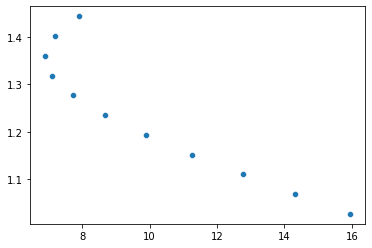

In [11]:
get_sharpe('DRREDDY.NS', 'INDUSINDBK.NS', d['1mo'])

In [30]:
def sharpe_df(pairings, d):
    sharpe_df={'1d':pd.DataFrame(), '1mo':pd.DataFrame()}
    plt.figure(figsize=(10,10))
    for i,tf in enumerate(sharpe_df.keys()):
        plt.subplot(2, 1, i+1)
        plt.gca().set_title(f'{tf} Timeframe')
        for comp1, comp2 in pairings:
            best=get_sharpe(comp1, comp2, d[tf]).iloc[0]
            sharpe_df[tf]=sharpe_df[tf].append(pd.Series([comp1, best['w1'], comp2, best['w2'], best['sharpe']]), ignore_index=True)
        plt.legend(pairings)
        sharpe_df[tf].columns=['Company 1', 'Weight of C1', 'Company 2', 'Weight of C2', 'Sharpe']
        sharpe_df[tf]['Sharpe']*=reg_dict[tf]

    return sharpe_df

3.7064169928765875
3.9691689001312205
2.157049427335921
4.198701151589305
3.921153382761008
74.2351499085733
93.22020358450983
42.5800618837621
105.58723602475727
92.16782091793999


C:\Users\YashC\AppData\Local\Temp\ipykernel_6380\2284435540.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_df[tf]=sharpe_df[tf].append(pd.Series([comp1, best['w1'], comp2, best['w2'], best['sharpe']]), ignore_index=True)
C:\Users\YashC\AppData\Local\Temp\ipykernel_6380\2284435540.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_df[tf]=sharpe_df[tf].append(pd.Series([comp1, best['w1'], comp2, best['w2'], best['sharpe']]), ignore_index=True)
C:\Users\YashC\AppData\Local\Temp\ipykernel_6380\2284435540.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_df[tf]=sharpe_df[tf].append(pd.Series([comp1, best['w1'], comp2, best['w2'], best['sharpe']]), ignore_index=True)
C:\Users\YashC\AppData\Local\Temp\

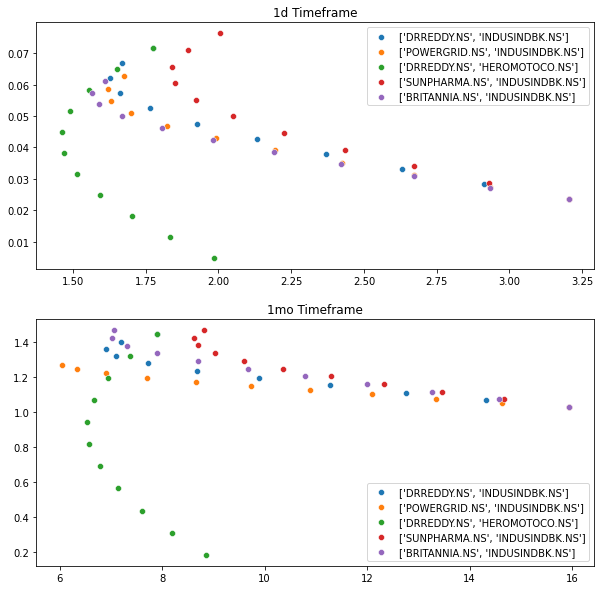

In [32]:
sharpe=sharpe_df(pairings, d)

In [31]:
sharpe['1mo']

Company 1  Weight of C1      Company 2  Weight of C2    Sharpe
0    DRREDDY.NS           1.0  INDUSINDBK.NS           0.0  4.972370
1  POWERGRID.NS           1.0  INDUSINDBK.NS           0.0  4.360341
2    DRREDDY.NS           1.0  HEROMOTOCO.NS           0.0  4.972370
3  SUNPHARMA.NS           1.0  INDUSINDBK.NS           0.0  5.062014
4  BRITANNIA.NS           1.0  INDUSINDBK.NS           0.0  5.048068

In [47]:
for key in sharpe.keys():
    sharpe[key].to_excel(f'sharpe_ratio_{key}.xlsx')

In [43]:
def winning_chances(stock):
    ret=d[stock].pct_change() *100
    win_prop=len(ret[ret>0])/len(d) *100
    return win_prop, 100-win_prop

winning_chances('DRREDDY.NS')

(50.161812297734635, 49.838187702265365)

In [18]:
def get_df(neg_corr):
    company1, company2, returns, sharpe, corr=[],[],[],[],[]
    for comp1, comp2 in neg_corr:
        company1.append(comp1)
        company2.append(comp2)
        corr.append(d[comp1].corr(d[comp2]))
        # sharpe.append(sharpe_ratio(comp1, comp2))
        # returns.append(calc_returns(comp1, comp2))

    return pd.DataFrame({
        "Stock 1":company1,
        "Stock 2":company2,
        "Correlation":corr,
        # "Sharpe Ratio":sharpe,
        # "Returns":returns,
    })

get_df(pairings)

Stock 1        Stock 2  Correlation
0    DRREDDY.NS  INDUSINDBK.NS    -0.773245
1  POWERGRID.NS  INDUSINDBK.NS    -0.283377
2    DRREDDY.NS  HEROMOTOCO.NS     0.046420
3  SUNPHARMA.NS  INDUSINDBK.NS    -0.257624
4  BRITANNIA.NS  INDUSINDBK.NS    -0.598868

In [19]:
import matplotlib.pyplot as plt

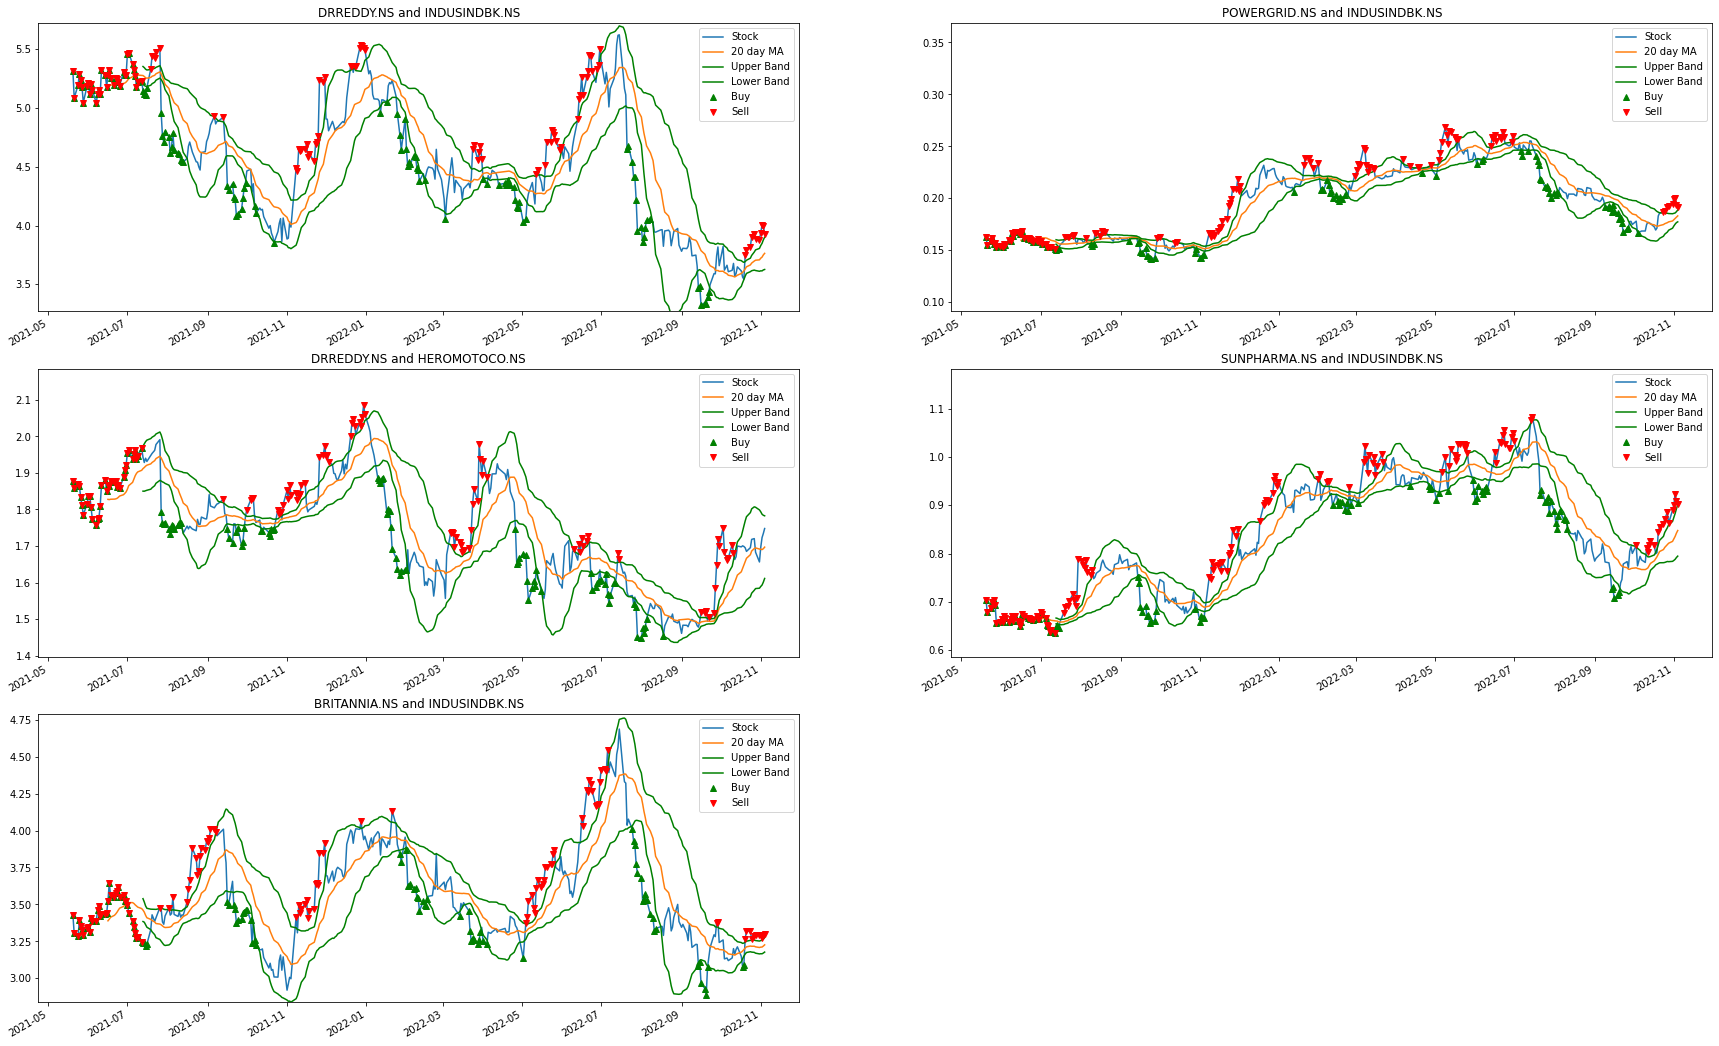

In [20]:
def make_bollinger(pairings):
    plt.figure(figsize=(30,20))
    i=1
    for stock1, stock2 in pairings:
        plt.subplot(3,2,i)
        i+=1
        ratio=d[stock1][-365:]/d[stock2][-365:]
        sma=ratio.rolling(20).mean()
        stdev=sma.rolling(20).std()
        pos, neg=sma+stdev*2, sma-stdev*(2)

        buy=ratio.copy()
        sell=ratio.copy()

        buy[ratio>neg]=0
        sell[ratio<pos]=0

        plt.plot(ratio)
        plt.plot(sma)
        plt.plot(pos, color='green')
        plt.plot(neg, color='green')
        buy.plot(color='g', linestyle='None', marker='^')
        sell.plot(color='r', linestyle='None', marker='v')
        plt.legend(['Stock', '20 day MA', 'Upper Band', 'Lower Band', 'Buy', 'Sell'])
        plt.title(stock1 + ' and ' + stock2)
        plt.gca().set_ylim([min(ratio)-0.05, max(ratio)+0.1])


make_bollinger(pairings)